In [1]:
import sys
#sys.path.insert(0, "../input/timm-efficientdet-pytorch")
#sys.path.insert(0, "../input/omegaconf")

import torch
import os
from datetime import datetime
import time
import random
import cv2
import pandas as pd
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2
from sklearn.model_selection import StratifiedKFold, KFold
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
import torch.nn as nn
from glob import glob

SEED = 42
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)

In [2]:
"""
marking = pd.read_csv('../input/global-wheat-detection/train.csv')

bboxs = np.stack(marking['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    marking[column] = bboxs[:,i]
marking.drop(columns=['bbox'], inplace=True)
"""
#marking = pd.DataFrame({"image_id":[os.path.splitext(i)[0] for i in os.listdir("/home/ubuntu/datasets/signate/fish/train_images")]})
annos = os.listdir("/home/ubuntu/datasets/signate/fish/train_annotations")
anno_path = "/home/ubuntu/datasets/signate/fish/train_annotations/"
import json
img_id = []
w = []

for anno in annos:
    print(anno[:-5])
    n = 0
    with open(anno_path + anno) as f:
        l = json.load(f)["labels"]
        l_keys = l.keys()
        for k in l_keys:
            if k in ["Jumper School","Breezer School"]:

                n += len(l[k])
    print(n)
    if not n == 0:
        img_id.append(anno[:-5])
            #for box in l[k]:
                #print(box)
    
marking = pd.DataFrame({"image_id":img_id})


#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=14)


df_folds = marking[['image_id']].copy()
#df_folds.loc[:, 'bbox_count'] = 1
#df_folds = df_folds.groupby('image_id').count()
#df_folds.loc[:, 'source'] = marking[['image_id', 'source']].groupby('image_id').min()['source']
#df_folds.loc[:, 'stratify_group'] = np.char.add(
#    df_folds['source'].values.astype(str),
#    df_folds['bbox_count'].apply(lambda x: f'_{x // 15}').values.astype(str)
#)
df_folds.loc[:, 'fold'] = 0
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.index)):
#for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.index, y=df_folds['stratify_group'])):
    df_folds.loc[df_folds.iloc[val_index].index, 'fold'] = fold_number

train_0000
3
train_0001
6
train_0002
3
train_0003
6
train_0004
1
train_0005
4
train_0006
1
train_0007
4
train_0008
4
train_0009
3
train_0010
1
train_0011
1
train_0012
2
train_0013
1
train_0014
6
train_0015
3
train_0016
5
train_0017
1
train_0018
1
train_0019
2
train_0020
3
train_0021
7
train_0022
3
train_0023
0
train_0024
1
train_0025
2
train_0026
3
train_0027
2
train_0028
4
train_0029
1
train_0030
0
train_0031
0
train_0032
3
train_0033
2
train_0034
3
train_0035
1
train_0036
2
train_0037
1
train_0038
1
train_0039
2
train_0040
1
train_0041
5
train_0042
11
train_0043
14
train_0044
3
train_0045
2
train_0046
7
train_0047
1
train_0048
1
train_0049
3
train_0050
2
train_0051
2
train_0052
3
train_0053
6
train_0054
3
train_0055
0
train_0056
1
train_0057
4
train_0058
6
train_0059
2
train_0060
1
train_0061
3
train_0062
2
train_0063
4
train_0064
4
train_0065
3
train_0066
3
train_0067
3
train_0068
1
train_0069
1
train_0070
4
train_0071
5
train_0072
5
train_0073
2
train_0074
3
train_0075
6
train_0076

1
train_0690
2
train_0691
6
train_0692
5
train_0693
1
train_0694
2
train_0695
2
train_0696
6
train_0697
12
train_0698
4
train_0699
5
train_0700
4
train_0701
5
train_0702
8
train_0703
5
train_0704
2
train_0705
1
train_0706
4
train_0707
0
train_0708
2
train_0709
3
train_0710
2
train_0711
3
train_0712
2
train_0713
6
train_0714
1
train_0715
2
train_0716
4
train_0717
2
train_0718
1
train_0719
2
train_0720
3
train_0721
2
train_0722
5
train_0723
0
train_0724
3
train_0725
3
train_0726
5
train_0727
1
train_0728
0
train_0729
2
train_0730
3
train_0731
2
train_0732
12
train_0733
3
train_0734
2
train_0735
4
train_0736
1
train_0737
3
train_0738
2
train_0739
5
train_0740
2
train_0741
0
train_0742
1
train_0743
7
train_0744
4
train_0745
6
train_0746
8
train_0747
0
train_0748
5
train_0749
0
train_0750
4
train_0751
2
train_0752
0
train_0753
0
train_0754
2
train_0755
0
train_0756
6
train_0757
6
train_0758
3
train_0759
1
train_0760
1
train_0761
4
train_0762
5
train_0763
0
train_0764
3
train_0765
3
train_07

4
train_1388
6
train_1389
3
train_1390
5
train_1391
7
train_1392
1
train_1393
0
train_1394
7
train_1395
1
train_1396
1
train_1397
2
train_1398
2
train_1399
3
train_1400
1
train_1401
0
train_1402
2
train_1403
2
train_1404
0
train_1405
3
train_1406
1
train_1407
1
train_1408
3
train_1409
0
train_1410
10
train_1411
10
train_1412
0
train_1413
5
train_1414
1
train_1415
1
train_1416
1
train_1417
2
train_1418
1
train_1419
0
train_1420
0
train_1421
4
train_1422
1
train_1423
3
train_1424
2
train_1425
2
train_1426
0
train_1427
4
train_1428
2
train_1429
1
train_1430
3
train_1431
2
train_1432
3
train_1433
6
train_1434
8
train_1435
3
train_1436
2
train_1437
0
train_1438
4
train_1439
2
train_1440
4
train_1441
3
train_1442
1
train_1443
1
train_1444
2
train_1445
2
train_1446
0
train_1447
1
train_1448
0
train_1449
2
train_1450
1
train_1451
2
train_1452
6
train_1453
4
train_1454
1
train_1455
5
train_1456
5
train_1457
3
train_1458
7
train_1459
1
train_1460
3
train_1461
2
train_1462
3
train_1463
6
train_14

3
train_2051
4
train_2052
3
train_2053
0
train_2054
2
train_2055
1
train_2056
3
train_2057
5
train_2058
9
train_2059
1
train_2060
2
train_2061
5
train_2062
5
train_2063
2
train_2064
6
train_2065
4
train_2066
2
train_2067
0
train_2068
3
train_2069
2
train_2070
3
train_2071
3
train_2072
6
train_2073
0
train_2074
3
train_2075
10
train_2076
0
train_2077
6
train_2078
11
train_2079
2
train_2080
0
train_2081
3
train_2082
5
train_2083
2
train_2084
2
train_2085
1
train_2086
0
train_2087
2
train_2088
3
train_2089
1
train_2090
1
train_2091
0
train_2092
2
train_2093
0
train_2094
4
train_2095
3
train_2096
3
train_2097
2
train_2098
1
train_2099
3
train_2100
2
train_2101
6
train_2102
2
train_2103
3
train_2104
3
train_2105
2
train_2106
2
train_2107
2
train_2108
0
train_2109
5
train_2110
6
train_2111
5
train_2112
0
train_2113
2
train_2114
1
train_2115
1
train_2116
3
train_2117
7
train_2118
4
train_2119
2
train_2120
2
train_2121
5
train_2122
1
train_2123
4
train_2124
0
train_2125
2
train_2126
0
train_21

7
train_2724
3
train_2725
5
train_2726
1
train_2727
1
train_2728
0
train_2729
0
train_2730
3
train_2731
1
train_2732
1
train_2733
1
train_2734
1
train_2735
0
train_2736
0
train_2737
1
train_2738
2
train_2739
7
train_2740
1
train_2741
0
train_2742
3
train_2743
0
train_2744
7
train_2745
6
train_2746
5
train_2747
6
train_2748
3
train_2749
4
train_2750
4
train_2751
3
train_2752
1
train_2753
0
train_2754
2
train_2755
3
train_2756
2
train_2757
2
train_2758
8
train_2759
3
train_2760
1
train_2761
4
train_2762
2
train_2763
7
train_2764
3
train_2765
3
train_2766
0
train_2767
3
train_2768
1
train_2769
6
train_2770
13
train_2771
2
train_2772
5
train_2773
3
train_2774
3
train_2775
1
train_2776
2
train_2777
5
train_2778
0
train_2779
0
train_2780
2
train_2781
0
train_2782
0
train_2783
4
train_2784
3
train_2785
5
train_2786
3
train_2787
0
train_2788
6
train_2789
1
train_2790
2
train_2791
1
train_2792
7
train_2793
7
train_2794
0
train_2795
1
train_2796
3
train_2797
7
train_2798
2
train_2799
1
train_280

3
train_3374
2
train_3375
1
train_3376
2
train_3377
7
train_3378
2
train_3379
4
train_3380
3
train_3381
6
train_3382
3
train_3383
3
train_3384
2
train_3385
2
train_3386
9


In [3]:
annos = os.listdir("/home/ubuntu/datasets/signate/fish/train_annotations")
anno_path = "/home/ubuntu/datasets/signate/fish/train_annotations/"
import json
img_id = []
w = []

for anno in annos:
    print(anno[:-4])
    n = 0
    with open(anno_path + anno) as f:
        l = json.load(f)["labels"]
        l_keys = l.keys()
        for k in l_keys:
            if k in ["Jumper School","Breezer School"]:

                n += len(l[k])
    print(n)
    if not n == 0:
        img_id.append(anno[:-4])
            #for box in l[k]:
                #print(box)
    
marking = pd.DataFrame({"image_id":img_id})


train_0000.
3
train_0001.
6
train_0002.
3
train_0003.
6
train_0004.
1
train_0005.
4
train_0006.
1
train_0007.
4
train_0008.
4
train_0009.
3
train_0010.
1
train_0011.
1
train_0012.
2
train_0013.
1
train_0014.
6
train_0015.
3
train_0016.
5
train_0017.
1
train_0018.
1
train_0019.
2
train_0020.
3
train_0021.
7
train_0022.
3
train_0023.
0
train_0024.
1
train_0025.
2
train_0026.
3
train_0027.
2
train_0028.
4
train_0029.
1
train_0030.
0
train_0031.
0
train_0032.
3
train_0033.
2
train_0034.
3
train_0035.
1
train_0036.
2
train_0037.
1
train_0038.
1
train_0039.
2
train_0040.
1
train_0041.
5
train_0042.
11
train_0043.
14
train_0044.
3
train_0045.
2
train_0046.
7
train_0047.
1
train_0048.
1
train_0049.
3
train_0050.
2
train_0051.
2
train_0052.
3
train_0053.
6
train_0054.
3
train_0055.
0
train_0056.
1
train_0057.
4
train_0058.
6
train_0059.
2
train_0060.
1
train_0061.
3
train_0062.
2
train_0063.
4
train_0064.
4
train_0065.
3
train_0066.
3
train_0067.
3
train_0068.
1
train_0069.
1
train_0070.
4
trai

1
train_0623.
3
train_0624.
6
train_0625.
2
train_0626.
2
train_0627.
0
train_0628.
1
train_0629.
1
train_0630.
9
train_0631.
8
train_0632.
2
train_0633.
4
train_0634.
2
train_0635.
1
train_0636.
1
train_0637.
0
train_0638.
1
train_0639.
4
train_0640.
1
train_0641.
0
train_0642.
2
train_0643.
2
train_0644.
3
train_0645.
2
train_0646.
2
train_0647.
8
train_0648.
9
train_0649.
3
train_0650.
3
train_0651.
3
train_0652.
3
train_0653.
6
train_0654.
1
train_0655.
5
train_0656.
1
train_0657.
7
train_0658.
4
train_0659.
3
train_0660.
2
train_0661.
2
train_0662.
3
train_0663.
3
train_0664.
2
train_0665.
1
train_0666.
4
train_0667.
4
train_0668.
3
train_0669.
1
train_0670.
4
train_0671.
4
train_0672.
3
train_0673.
4
train_0674.
6
train_0675.
3
train_0676.
3
train_0677.
3
train_0678.
2
train_0679.
5
train_0680.
1
train_0681.
3
train_0682.
4
train_0683.
1
train_0684.
1
train_0685.
1
train_0686.
8
train_0687.
1
train_0688.
0
train_0689.
1
train_0690.
2
train_0691.
6
train_0692.
5
train_0693.
1
trai

14
train_1221.
2
train_1222.
1
train_1223.
1
train_1224.
0
train_1225.
3
train_1226.
4
train_1227.
1
train_1228.
1
train_1229.
4
train_1230.
2
train_1231.
1
train_1232.
1
train_1233.
3
train_1234.
1
train_1235.
1
train_1236.
4
train_1237.
6
train_1238.
3
train_1239.
3
train_1240.
0
train_1241.
4
train_1242.
1
train_1243.
0
train_1244.
3
train_1245.
6
train_1246.
1
train_1247.
1
train_1248.
7
train_1249.
0
train_1250.
2
train_1251.
2
train_1252.
1
train_1253.
0
train_1254.
2
train_1255.
12
train_1256.
2
train_1257.
1
train_1258.
7
train_1259.
0
train_1260.
2
train_1261.
3
train_1262.
0
train_1263.
2
train_1264.
2
train_1265.
2
train_1266.
2
train_1267.
0
train_1268.
1
train_1269.
1
train_1270.
10
train_1271.
3
train_1272.
4
train_1273.
0
train_1274.
1
train_1275.
0
train_1276.
0
train_1277.
3
train_1278.
8
train_1279.
4
train_1280.
0
train_1281.
3
train_1282.
4
train_1283.
11
train_1284.
1
train_1285.
3
train_1286.
4
train_1287.
4
train_1288.
2
train_1289.
8
train_1290.
8
train_1291.
2


1
train_1817.
3
train_1818.
2
train_1819.
5
train_1820.
2
train_1821.
7
train_1822.
0
train_1823.
6
train_1824.
0
train_1825.
5
train_1826.
0
train_1827.
4
train_1828.
10
train_1829.
2
train_1830.
0
train_1831.
2
train_1832.
1
train_1833.
2
train_1834.
1
train_1835.
2
train_1836.
7
train_1837.
4
train_1838.
1
train_1839.
1
train_1840.
2
train_1841.
5
train_1842.
3
train_1843.
3
train_1844.
10
train_1845.
2
train_1846.
0
train_1847.
5
train_1848.
7
train_1849.
1
train_1850.
1
train_1851.
2
train_1852.
2
train_1853.
2
train_1854.
7
train_1855.
1
train_1856.
2
train_1857.
2
train_1858.
1
train_1859.
2
train_1860.
5
train_1861.
2
train_1862.
4
train_1863.
4
train_1864.
2
train_1865.
0
train_1866.
7
train_1867.
0
train_1868.
2
train_1869.
1
train_1870.
1
train_1871.
0
train_1872.
6
train_1873.
0
train_1874.
0
train_1875.
1
train_1876.
3
train_1877.
1
train_1878.
1
train_1879.
3
train_1880.
13
train_1881.
1
train_1882.
4
train_1883.
0
train_1884.
1
train_1885.
5
train_1886.
3
train_1887.
3
t

2
train_2447.
1
train_2448.
1
train_2449.
2
train_2450.
2
train_2451.
1
train_2452.
0
train_2453.
4
train_2454.
2
train_2455.
2
train_2456.
2
train_2457.
4
train_2458.
4
train_2459.
1
train_2460.
5
train_2461.
5
train_2462.
3
train_2463.
3
train_2464.
0
train_2465.
2
train_2466.
0
train_2467.
6
train_2468.
3
train_2469.
1
train_2470.
6
train_2471.
3
train_2472.
1
train_2473.
3
train_2474.
3
train_2475.
6
train_2476.
5
train_2477.
2
train_2478.
1
train_2479.
0
train_2480.
6
train_2481.
0
train_2482.
3
train_2483.
7
train_2484.
3
train_2485.
2
train_2486.
4
train_2487.
5
train_2488.
3
train_2489.
1
train_2490.
4
train_2491.
2
train_2492.
1
train_2493.
4
train_2494.
2
train_2495.
7
train_2496.
4
train_2497.
15
train_2498.
1
train_2499.
7
train_2500.
3
train_2501.
4
train_2502.
13
train_2503.
3
train_2504.
2
train_2505.
3
train_2506.
3
train_2507.
2
train_2508.
7
train_2509.
12
train_2510.
4
train_2511.
1
train_2512.
2
train_2513.
2
train_2514.
3
train_2515.
3
train_2516.
0
train_2517.
5
t

4
train_3087.
9
train_3088.
2
train_3089.
3
train_3090.
3
train_3091.
1
train_3092.
4
train_3093.
3
train_3094.
3
train_3095.
4
train_3096.
5
train_3097.
2
train_3098.
0
train_3099.
2
train_3100.
4
train_3101.
1
train_3102.
2
train_3103.
1
train_3104.
0
train_3105.
2
train_3106.
3
train_3107.
5
train_3108.
0
train_3109.
1
train_3110.
1
train_3111.
0
train_3112.
8
train_3113.
5
train_3114.
5
train_3115.
10
train_3116.
1
train_3117.
1
train_3118.
1
train_3119.
2
train_3120.
5
train_3121.
1
train_3122.
2
train_3123.
7
train_3124.
4
train_3125.
7
train_3126.
4
train_3127.
0
train_3128.
1
train_3129.
12
train_3130.
1
train_3131.
7
train_3132.
2
train_3133.
3
train_3134.
3
train_3135.
1
train_3136.
1
train_3137.
0
train_3138.
1
train_3139.
4
train_3140.
3
train_3141.
2
train_3142.
3
train_3143.
3
train_3144.
0
train_3145.
0
train_3146.
1
train_3147.
1
train_3148.
0
train_3149.
3
train_3150.
2
train_3151.
2
train_3152.
4
train_3153.
7
train_3154.
8
train_3155.
6
train_3156.
0
train_3157.
8
tr

In [4]:
def get_train_transforms():
    return A.Compose(
        [
#            A.RandomSizedCrop(min_max_height=(800, 800), height=1024, width=1024, p=0.5),
            A.OneOf([
                A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, 
                                     val_shift_limit=0.2, p=0.9),
                A.RandomBrightnessContrast(brightness_limit=0.2, 
                                           contrast_limit=0.2, p=0.9),
            ],p=0.9),
            A.ToGray(p=0.01),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Resize(height=512, width=512, p=1),
            A.Cutout(num_holes=2, max_h_size=32, max_w_size=32, fill_value=0, p=0.5),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

def get_valid_transforms():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

In [5]:
TRAIN_ROOT_PATH = '../input/global-wheat-detection/train'
TRAIN_ROOT_PATH = "/home/ubuntu/datasets/signate/fish/train_images"
ANNO_ROOT_PATH = "/home/ubuntu/datasets/signate/fish/train_annotations/"


class DatasetRetriever(Dataset):

    def __init__(self, marking, image_ids, transforms=None, test=False):
        super().__init__()

        self.image_ids = image_ids
        self.marking = marking
        self.transforms = transforms
        self.test = test
    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        
        if self.test or random.random() > 0.0:
            image, boxes, labels = self.load_image_and_boxes(index)
        else:
            image, boxes = self.load_cutmix_image_and_boxes(index)

        # there is only one class
        #labels = torch.ones((boxes.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = torch.tensor(labels)
        target['image_id'] = torch.tensor([index])
        
        if self.transforms:
            for i in range(10):
                sample = self.transforms(**{
                    'image': image,
                    'bboxes': target['boxes'],
                    'labels': labels
                })
                if len(sample['bboxes']) > 0:
                    image = sample['image']
                    target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)
                    target['boxes'][:,[0,1,2,3]] = target['boxes'][:,[1,0,3,2]]  #yxyx: be warning
                    break

        return image, target, image_id
    
    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def load_image_and_boxes(self, index):
        image_id = self.image_ids[index]
        #print(image_id)
        image = cv2.imread(f'{TRAIN_ROOT_PATH}/{image_id}.jpg', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        #records = self.marking[self.marking['image_id'] == image_id]
        #boxes = records[['x', 'y', 'w', 'h']].values
        #boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        #boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
        boxes = []
        labels = []
        label_id = ["Jumper School","Breezer School"]
        with open(ANNO_ROOT_PATH + image_id + ".json") as f:
            l = json.load(f)["labels"]
            l_keys = l.keys()
            for k in l_keys:
                if k in label_id:
                    for box in l[k]:
                        boxes.append(box)
                        labels.append(label_id.index(k) + 1)
        #print(labels)
        #print(boxes)
        return image, np.array(boxes), labels
    
    def load_cutmix_image_and_boxes(self, index, imsize=1024):
        """ 
        This implementation of cutmix author:  https://www.kaggle.com/nvnnghia 
        Refactoring and adaptation: https://www.kaggle.com/shonenkov
        """
        w, h = imsize, imsize
        s = imsize // 2
    
        xc, yc = [int(random.uniform(imsize * 0.25, imsize * 0.75)) for _ in range(2)]  # center x, y
        indexes = [index] + [random.randint(0, self.image_ids.shape[0] - 1) for _ in range(3)]

        result_image = np.full((imsize, imsize, 3), 1, dtype=np.float32)
        result_boxes = []
        
        for i, index in enumerate(indexes):
            image, boxes = self.load_image_and_boxes(index)
            if i == 0:
                x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
                x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
            elif i == 1:  # top right
                x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
                x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
            elif i == 2:  # bottom left
                x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
                x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
            elif i == 3:  # bottom right
                x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
                x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)
            result_image[y1a:y2a, x1a:x2a] = image[y1b:y2b, x1b:x2b]
            padw = x1a - x1b
            padh = y1a - y1b

            boxes[:, 0] += padw
            boxes[:, 1] += padh
            boxes[:, 2] += padw
            boxes[:, 3] += padh

            result_boxes.append(boxes)

        result_boxes = np.concatenate(result_boxes, 0)
        np.clip(result_boxes[:, 0:], 0, 2 * s, out=result_boxes[:, 0:])
        result_boxes = result_boxes.astype(np.int32)
        result_boxes = result_boxes[np.where((result_boxes[:,2]-result_boxes[:,0])*(result_boxes[:,3]-result_boxes[:,1]) > 0)]
        return result_image, result_boxes

In [6]:
fold_number = 0

train_dataset = DatasetRetriever(
    #image_ids=df_folds[df_folds['fold'] != fold_number].index.values,
    image_ids=df_folds[df_folds['fold'] != fold_number].image_id.values,
    marking=marking,
    transforms=get_train_transforms(),
    test=False,
)

validation_dataset = DatasetRetriever(
    image_ids=df_folds[df_folds['fold'] == fold_number].image_id.values,
    marking=marking,
    transforms=get_valid_transforms(),
    test=True,
)

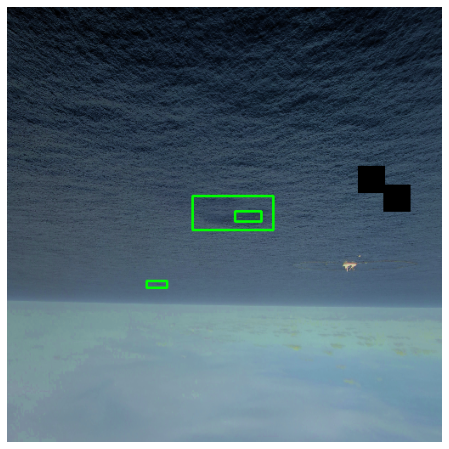

In [7]:
image, target, image_id = train_dataset[2]
boxes = target['boxes'].cpu().numpy().astype(np.int32)

numpy_image = image.permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image);

In [8]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [9]:
import warnings

warnings.filterwarnings("ignore")

class Fitter:
    
    def __init__(self, model, device, config):
        self.config = config
        self.epoch = 0

        self.base_dir = f'./{config.folder}'
        if not os.path.exists(self.base_dir):
            os.makedirs(self.base_dir)
        
        self.log_path = f'{self.base_dir}/log.txt'
        self.best_summary_loss = 10**5

        self.model = model
        self.device = device

        param_optimizer = list(self.model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
            {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ] 

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=config.lr)
        self.scheduler = config.SchedulerClass(self.optimizer, **config.scheduler_params)
        self.log(f'Fitter prepared. Device is {self.device}')

    def fit(self, train_loader, validation_loader):
        for e in range(self.config.n_epochs):
            if self.config.verbose:
                lr = self.optimizer.param_groups[0]['lr']
                timestamp = datetime.utcnow().isoformat()
                self.log(f'\n{timestamp}\nLR: {lr}')

            t = time.time()
            summary_loss = self.train_one_epoch(train_loader)

            self.log(f'[RESULT]: Train. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            self.save(f'{self.base_dir}/last-checkpoint.bin')

            t = time.time()
            summary_loss = self.validation(validation_loader)

            self.log(f'[RESULT]: Val. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            if summary_loss.avg < self.best_summary_loss:
                self.best_summary_loss = summary_loss.avg
                self.model.eval()
                self.save(f'{self.base_dir}/best-checkpoint-{str(self.epoch).zfill(3)}epoch.bin')
                for path in sorted(glob(f'{self.base_dir}/best-checkpoint-*epoch.bin'))[:-3]:
                    os.remove(path)

            if self.config.validation_scheduler:
                self.scheduler.step(metrics=summary_loss.avg)

            self.epoch += 1

    def validation(self, val_loader):
        self.model.eval()
        summary_loss = AverageMeter()
        t = time.time()
        for step, (images, targets, image_ids) in enumerate(val_loader):
            if self.config.verbose:
                if step % self.config.verbose_step == 0:
                    print(
                        f'Val Step {step}/{len(val_loader)}, ' + \
                        f'summary_loss: {summary_loss.avg:.5f}, ' + \
                        f'time: {(time.time() - t):.5f}', end='\r'
                    )
            with torch.no_grad():
                images = torch.stack(images)
                batch_size = images.shape[0]
                images = images.to(self.device).float()
                boxes = [target['boxes'].to(self.device).float() for target in targets]
                labels = [target['labels'].to(self.device).float() for target in targets]

                #loss= self.model(images, {"bbox":boxes, "cls":labels})["loss"]
                target_res = {}
                target_res['bbox'] = boxes
                target_res['cls'] = labels 
                target_res["img_scale"] = torch.tensor([1.0] * batch_size, dtype=torch.float).to(self.device)
                target_res["img_size"] = torch.tensor([images[0].shape[-2:]] * batch_size, dtype=torch.float).to(self.device)

                outputs = self.model(images, target_res)
                loss = outputs["loss"]
                summary_loss.update(loss.detach().item(), batch_size)


        return summary_loss

    def train_one_epoch(self, train_loader):
        self.model.train()
        summary_loss = AverageMeter()
        t = time.time()
        for step, (images, targets, image_ids) in enumerate(train_loader):
            if self.config.verbose:
                if step % self.config.verbose_step == 0:
                    print(
                        f'Train Step {step}/{len(train_loader)}, ' + \
                        f'summary_loss: {summary_loss.avg:.5f}, ' + \
                        f'time: {(time.time() - t):.5f}', end='\r'
                    )


            images = torch.stack(images)
            images = images.to(self.device).float()
            batch_size = images.shape[0]
            boxes = [target['boxes'].to(self.device).float() for target in targets]
            labels = [target['labels'].to(self.device).float() for target in targets]
            
            self.optimizer.zero_grad()

            output = self.model(images, {"bbox":boxes, "cls":labels})
            loss = output["loss"]
            
            loss.backward()

            summary_loss.update(loss.detach().item(), batch_size)

            self.optimizer.step()

            if self.config.step_scheduler:
                self.scheduler.step()

        return summary_loss
    
    def save(self, path):
        self.model.eval()
        torch.save({
            'model_state_dict': self.model.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_summary_loss': self.best_summary_loss,
            'epoch': self.epoch,
        }, path)

    def load(self, path):
        checkpoint = torch.load(path)
        self.model.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.best_summary_loss = checkpoint['best_summary_loss']
        self.epoch = checkpoint['epoch'] + 1
        
    def log(self, message):
        if self.config.verbose:
            print(message)
        with open(self.log_path, 'a+') as logger:
            logger.write(f'{message}\n')


In [10]:
class TrainGlobalConfig:
    num_workers = 2
    batch_size = 1
    n_epochs = 3 # n_epochs = 40
    lr = 0.0002

    folder = 'effdet5-cutmix-augmix'

    # -------------------
    verbose = True
    verbose_step = 1
    # -------------------

    # --------------------
    step_scheduler = False  # do scheduler.step after optimizer.step
    validation_scheduler = True  # do scheduler.step after validation stage loss
    
    SchedulerClass = torch.optim.lr_scheduler.ReduceLROnPlateau
    scheduler_params = dict(
        mode='min',
        factor=0.5,
        patience=1,
        verbose=False, 
        threshold=0.0001,
        threshold_mode='abs',
        cooldown=0, 
        min_lr=1e-8,
        eps=1e-08
    )
    # --------------------

In [11]:
def collate_fn(batch):
    return tuple(zip(*batch))

def run_training():
    device = torch.device('cuda:0')
    net.to(device)

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=TrainGlobalConfig.batch_size,
        sampler=RandomSampler(train_dataset),
        pin_memory=False,
        drop_last=True,
        num_workers=TrainGlobalConfig.num_workers,
        collate_fn=collate_fn,
    )
    val_loader = torch.utils.data.DataLoader(
        validation_dataset, 
        batch_size=TrainGlobalConfig.batch_size,
        num_workers=TrainGlobalConfig.num_workers,
        shuffle=False,
        sampler=SequentialSampler(validation_dataset),
        pin_memory=False,
        collate_fn=collate_fn,
    )

    fitter = Fitter(model=net, device=device, config=TrainGlobalConfig)
    fitter.fit(train_loader, val_loader)

In [12]:
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet



def get_net():
    config = get_efficientdet_config('tf_efficientdet_d5')
    config.num_classes = 2
    config.image_size = (512,512)
    #print(config)

    net = EfficientDet(config, pretrained_backbone=False)
    #checkpoint = torch.load('../input/efficientdet/efficientdet_d5-ef44aea8.pth')
    #net.load_state_dict(checkpoint)

    net.reset_head(num_classes=2)

    net.class_net = HeadNet(config, num_outputs=2)
    #net.class_net = HeadNet(config, num_outputs=2, norm_kwargs=dict(eps=.001, momentum=.01))

    return DetBenchTrain(net, config)

net = get_net()
#net = nn.DataParallel(net)

In [13]:
#run_training()

In [76]:
from effdet import DetBenchPredict
from effdet import create_model

def get_test_net():
    config = get_efficientdet_config('tf_efficientdet_d5')
    config.num_classes = 2
    config.image_size = (512,512)
    config.soft_nms = True
    #print(config)

    testnet = EfficientDet(config, pretrained_backbone=False)
    #checkpoint = torch.load('../input/efficientdet/efficientdet_d5-ef44aea8.pth')
    #net.load_state_dict(checkpoint)
    checkpoint = torch.load("effdet5-cutmix-augmix/best-checkpoint-002epoch.bin")
    testnet.load_state_dict(checkpoint['model_state_dict'])

    #testnet.reset_head(num_classes=2)

    #net.class_net = HeadNet(config, num_outputs=2)
    #net.class_net = HeadNet(config, num_outputs=2, norm_kwargs=dict(eps=.001, momentum=.01))
    #bench = create_model(
    #    model_name = "tf_efficientdet_d5",
    #    bench_task='predict',
    #    num_classes=2,
    #    pretrained=True,
        #redundant_bias=args.redundant_bias,
    #    soft_nms=False,
    #    checkpoint_path="effdet5-cutmix-augmix/last-checkpoint.bin",
        #checkpoint_ema=args.use_ema,
    #)
    
    
    return DetBenchPredict(testnet)

predict_net = get_test_net()



In [235]:
class submitDataset(Dataset):
    def __init__(self, src = "/home/ubuntu/datasets/signate/fish/test_images/", transform = False):
        super().__init__()
        self.src_path = src
        self.transforms = transform
        self.image_ids = os.listdir(self.src_path)

    def __getitem__(self, index: int):
        image_id = self.image_ids[index]  
        image= self.load_image(image_id)
        print(image.shape)
        sample = {
            #"img_scale":torch.tensor(image.shape[1]/image.shape[2]).float(),
            #"img_scale":torch.tensor(image.shape[1]/image.shape[0]).float(),
            "img_scale":torch.tensor(1.0).float(),
            #"img_size":torch.tensor([image.shape[0],image.shape[1]]).float()}
            "img_size":torch.tensor([512,512])}

        if self.transforms:
            image = self.transforms(**{'image': image})

        return torch.tensor(image["image"], dtype = torch.float), sample
    
    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def load_image(self, image_id):
        image = cv2.imread(f'{self.src_path}/{image_id}', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        return image
    
def get_test_transforms():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0, 
        )

sub_dataset = submitDataset(transform = get_test_transforms())

In [236]:
predict_net.eval()
predict_net.to('cuda:2')
print("")

In [237]:
def make_submit():
    outputs = []
    device = "cuda:2"

    for i, data in enumerate(sub_dataset):
        print("\r",i, end = "")
        img, sample = data
        print(sample)
        with torch.no_grad():
            img = img.unsqueeze(0).to(device)
            sample = {"img_scale":sample["img_scale"].unsqueeze(0).to(device),
                     "img_size":sample["img_size"].unsqueeze(0).to(device)}
            #print(img.shape[-2:])
            output = predict_net(img, 
                                 #{"img_scale":None, "img_size": None}
                                 sample
                                #"img_scale":torch.tensor([1.0] * 1, dtype=torch.float).to(device),
                                # "img_size":torch.tensor([img.shape[-2:]] * 1, dtype=torch.float).to(device)}
                                #"img_scale":torch.tensor([1]).float(), 
                                #"img_size":torch.tensor([1000]).float()}
                                )
        if i == 5:
            break
        outputs.append(output)
    return outputs
    #predict_net(torch.tensor(sub_dataset[0]["image"], dtype = torch.float).unsqueeze(0),{"target":0})
    
out = make_submit()

(2160, 3840, 3)
 0{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
(2160, 3840, 3)
 1{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
(2160, 3840, 3)
 2{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
(2160, 3840, 3)
 3{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
(2160, 3840, 3)
 4{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
(2160, 3840, 3)
 5{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}


In [238]:
out[2][:,:,4]

tensor([[0.3189, 0.3104, 0.3101, 0.2704, 0.2652, 0.2587, 0.2540, 0.2510, 0.2505,
         0.2504, 0.2451, 0.2438, 0.2403, 0.2302, 0.2204, 0.2168, 0.1978, 0.1902,
         0.1899, 0.1783, 0.1762, 0.1690, 0.1645, 0.1598, 0.1590, 0.1548, 0.1542,
         0.1519, 0.1510, 0.1501, 0.1501, 0.1493, 0.1460, 0.1406, 0.1402, 0.1396,
         0.1382, 0.1353, 0.1351, 0.1336, 0.1291, 0.1283, 0.1261, 0.1260, 0.1241,
         0.1241, 0.1194, 0.1180, 0.1170, 0.1169, 0.1167, 0.1160, 0.1157, 0.1143,
         0.1118, 0.1117, 0.1113, 0.1102, 0.1099, 0.1098, 0.1088, 0.1076, 0.1072,
         0.1066, 0.1058, 0.1041, 0.1031, 0.1030, 0.1028, 0.1028, 0.1027, 0.1025,
         0.1025, 0.1023, 0.1015, 0.1012, 0.1012, 0.1004, 0.0998, 0.0992, 0.0988,
         0.0978, 0.0965, 0.0964, 0.0964, 0.0962, 0.0961, 0.0956, 0.0954, 0.0954,
         0.0952, 0.0950, 0.0947, 0.0946, 0.0943, 0.0942, 0.0940, 0.0936, 0.0927,
         0.0927]], device='cuda:2')

In [239]:
out[2]

tensor([[[8.7376e+01, 0.0000e+00, 5.1200e+02, 9.7630e+00, 3.1886e-01,
          1.0000e+00],
         [8.7376e+01, 0.0000e+00, 5.1200e+02, 9.7630e+00, 3.1041e-01,
          2.0000e+00],
         [5.1200e+02, 0.0000e+00, 5.1200e+02, 9.1220e+01, 3.1010e-01,
          2.0000e+00],
         [5.1200e+02, 0.0000e+00, 5.1200e+02, 0.0000e+00, 2.7036e-01,
          2.0000e+00],
         [3.6295e+02, 2.7873e+02, 5.1200e+02, 3.3245e+02, 2.6515e-01,
          2.0000e+00],
         [3.6295e+02, 2.7873e+02, 5.1200e+02, 3.3245e+02, 2.5865e-01,
          1.0000e+00],
         [4.9153e+02, 1.1250e+02, 5.1200e+02, 3.5303e+02, 2.5402e-01,
          2.0000e+00],
         [5.1200e+02, 0.0000e+00, 5.1200e+02, 0.0000e+00, 2.5101e-01,
          1.0000e+00],
         [5.1200e+02, 0.0000e+00, 5.1200e+02, 0.0000e+00, 2.5051e-01,
          1.0000e+00],
         [5.1200e+02, 0.0000e+00, 5.1200e+02, 9.1220e+01, 2.5039e-01,
          1.0000e+00],
         [3.4814e+02, 0.0000e+00, 5.1200e+02, 1.8717e+02, 2.4512e-01,


In [240]:
out[2].shape

torch.Size([1, 100, 6])

(2160, 3840, 3)
{'img_scale': tensor(1.), 'img_size': tensor([512, 512])}
[ 87.37601    0.       512.         9.762962]
[ 87.37601    0.       512.         9.762962]
[512.         0.       512.        91.219574]
[512.   0. 512.   0.]
[362.94598 278.72882 512.      332.45197]
[362.94598 278.72882 512.      332.45197]
[491.5255  112.50092 512.      353.03003]
[512.   0. 512.   0.]
[512.   0. 512.   0.]
[512.         0.       512.        91.219574]


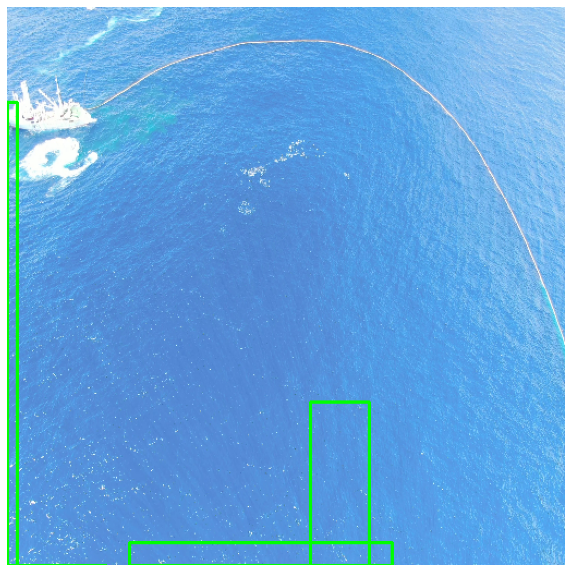

In [241]:
image,sample = sub_dataset[2]
print(sample)
#boxes = target['boxes'].cpu().numpy().astype(np.int32)
boxes = out[2][0][:, :4]
boxes = boxes[:10]

numpy_image = image.permute(1,2,0).cpu().numpy()
numpy_image = cv2.resize(numpy_image, (512, 512))
fig, ax = plt.subplots(1, 1, figsize=(10, 16))

for box in boxes:
    box = box.cpu().detach().numpy()
    print(box)
    cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image);

In [232]:
boxes[0]

tensor([ 87.3760,   0.0000, 641.3751,   9.7630], device='cuda:2')

In [209]:
sub_dataset[0]

(2160, 3840, 3)


(tensor([[[0.5706, 0.6441, 0.6036,  ..., 0.6013, 0.6912, 0.6739],
          [0.4513, 0.4559, 0.5071,  ..., 0.5559, 0.5789, 0.5816],
          [0.4358, 0.4585, 0.4287,  ..., 0.6263, 0.6296, 0.5627],
          ...,
          [0.1036, 0.0941, 0.0902,  ..., 0.8920, 0.7529, 0.8898],
          [0.1036, 0.1020, 0.0972,  ..., 0.9807, 0.9930, 0.8260],
          [0.1095, 0.0955, 0.1102,  ..., 0.9659, 0.9886, 0.7250]],
 
         [[0.7360, 0.8116, 0.7770,  ..., 0.7183, 0.8197, 0.8073],
          [0.6500, 0.6512, 0.6908,  ..., 0.6774, 0.6887, 0.7091],
          [0.6139, 0.6327, 0.6127,  ..., 0.7400, 0.7317, 0.6721],
          ...,
          [0.2252, 0.2157, 0.2118,  ..., 0.8881, 0.7372, 0.8741],
          [0.2251, 0.2235, 0.2188,  ..., 0.9768, 0.9920, 0.8103],
          [0.2311, 0.2171, 0.2318,  ..., 0.9604, 0.9847, 0.7093]],
 
         [[0.8491, 0.9100, 0.8563,  ..., 0.8021, 0.8720, 0.8449],
          [0.7708, 0.7595, 0.7914,  ..., 0.7598, 0.7748, 0.7832],
          [0.7483, 0.7554, 0.7227,  ...,